### Notebook to prepare the full dataset used for training of different models, combining different code throughout this repo


In [1]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'
from desiutil.plots import plot_sky_binned, plot_healpix_map

# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 512
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2pixarea(NSIDE, degrees=True)))


def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))

Approximate resolution at NSIDE 512 is 0.11 deg
Approximate resolution at NSIDE 512 is 0.013 deg


# South

In [2]:
df_south = pd.read_csv('../../bricks_data/galaxy_catalogue_south.csv',
                       dtype={'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8', 'GLBG':'int8','RLBG':'int8'})

df_south = df_south.drop_duplicates()
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_south = df_south.dropna(axis=0, inplace=False, how='any')
print(len(df_south))

84497085


### Removing the Large Magellanic Cloud at Area
Large Magellanic Cloud (Ra 52:100 and DEC -70 to -50 respectively)

In [3]:
df_magellanic = df_south[(df_south['RA'] <=100) & (df_south['RA'] >=52) & (df_south['DEC'] <= -50) & (df_south['DEC'] >= -70)]
print(f'Objects in Magellanic Cloud: {len(df_magellanic)}')

Objects in Magellanic Cloud: 2727957


### 2. Get Galaxy Count per Healpy Pixel

In [4]:
# Magellanic
ra_magellanic = df_magellanic["RA"].to_numpy(copy=True)
dec_magellanic = df_magellanic["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_magellanic, dec_magellanic)

print("Number of LRGs in Sample:", len(ra_magellanic))

magellanic_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(magellanic_pixel_indices, return_counts=True)


mean_magellanic = counts.mean()
print("Mean LRGs per Pixel:", mean_magellanic)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_magellanic = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_magellanic.pixel_id = df_magellanic.pixel_id.astype(int)
# LRG
df_LRG = df_south[df_south["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)
mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)
# elg

df_ELG = df_south[df_south["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)
mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

df_QSO = df_south[df_south["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)
mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)
df_GLBG = df_south[df_south["GLBG"] == 1]
ra_GLBG = df_GLBG["RA"].to_numpy(copy=True)
dec_GLBG = df_GLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_GLBG, dec_GLBG)

print("Number of GLBGs in Sample:", len(ra_GLBG))

GLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(GLBG_pixel_indices, return_counts=True)
mean_GLBG = counts.mean()
print("Mean GLBGs per Pixel:", mean_GLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_glbg = pd.DataFrame(id_density, columns=['pixel_id', 'glbg'])
df_glbg.pixel_id = df_glbg.pixel_id.astype(int)
df_RLBG = df_south[df_south["RLBG"] == 1]
ra_RLBG = df_RLBG["RA"].to_numpy(copy=True)
dec_RLBG = df_RLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_RLBG, dec_RLBG)

print("Number of RLBGs in Sample:", len(ra_RLBG))

RLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(RLBG_pixel_indices, return_counts=True)
mean_RLBG = counts.mean()
print("Mean RLBGs per Pixel:", mean_RLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_rlbg = pd.DataFrame(id_density, columns=['pixel_id', 'rlbg'])
df_rlbg.pixel_id = df_rlbg.pixel_id.astype(int)
df_south = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_qso, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_glbg, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_rlbg, how='outer', on='pixel_id')
# Filling all pixels where I do not have counts for all 3 types of galaxies
df_south.fillna(value=0, inplace=True)
print(df_south.shape)
# Removing the Magellanic Cloud
print("Len before removal:", len(df_south))
intersection = pd.Series(list(set(df_south.pixel_id) & set(df_magellanic.pixel_id)))
print("Pixels removed:", len(intersection))
df_south = df_south[~(df_south['pixel_id'].isin(intersection))]
print("Len after removal:", len(df_south))
df_south = df_south.astype(int)

Number of LRGs in Sample: 2727957
Mean LRGs per Pixel: 95.01104067985511
Number of LRGs in Sample: 9555538
Mean LRGs per Pixel: 8.480747435284135
Number of ELGs in Sample: 36438777
Mean ELGs per Pixel: 32.206831542188034
Number of QSOs in Sample: 4548589
Mean QSOs per Pixel: 4.152040105631457
Number of GLBGs in Sample: 27904595
Mean GLBGs per Pixel: 24.67570497668574
Number of RLBGs in Sample: 7965144
Mean RLBGs per Pixel: 7.188427247482291
(1132194, 6)
Len before removal: 1132194
Pixels removed: 28712
Len after removal: 1103482


### 3. Plotting Galaxy Densities

0.0 180.0 -180.0 180.0


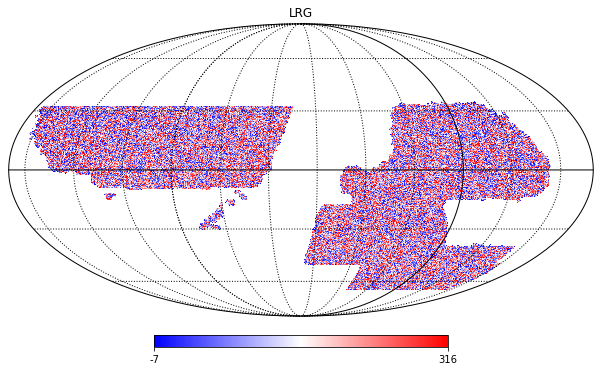

In [5]:
m_LRG = np.zeros(NPIX)

m_LRG[df_south.pixel_id.to_numpy()] = df_south.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


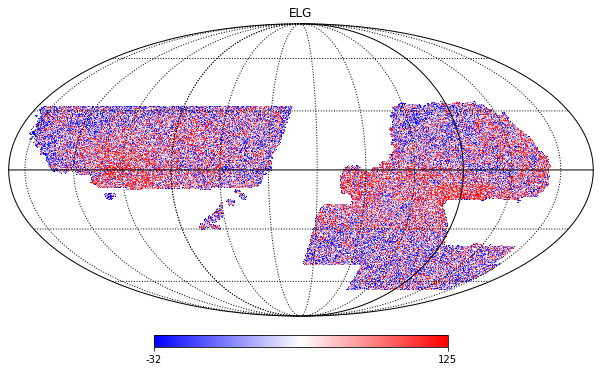

In [6]:
m_ELG = np.zeros(NPIX)

m_ELG[df_south.pixel_id.to_numpy()] = df_south.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


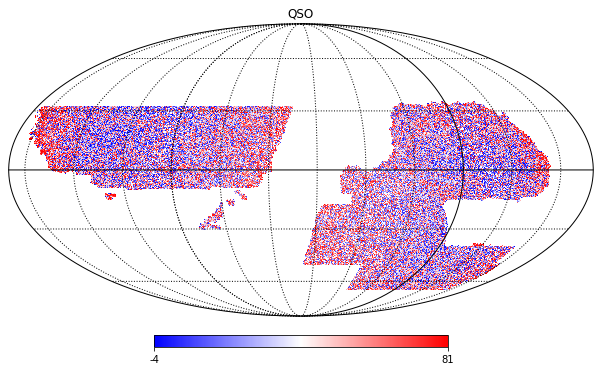

In [7]:
m_QSO = np.zeros(NPIX)

m_QSO[df_south.pixel_id.to_numpy()] = df_south.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


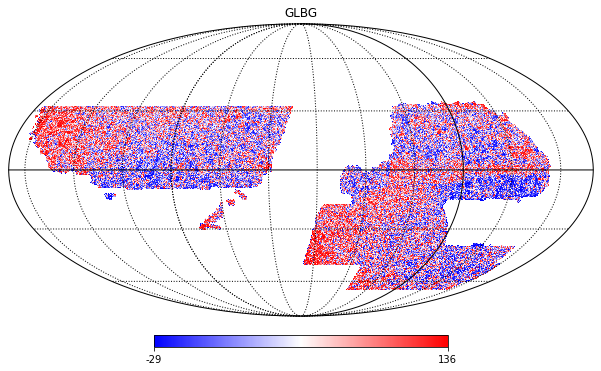

In [8]:
m_GLBG = np.zeros(NPIX)

m_GLBG[df_south.pixel_id.to_numpy()] = df_south.glbg.to_numpy()
mask = (m_GLBG == 0)
m_GLBG[mask] = np.nan
hp.mollview(m_GLBG, title="GLBG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


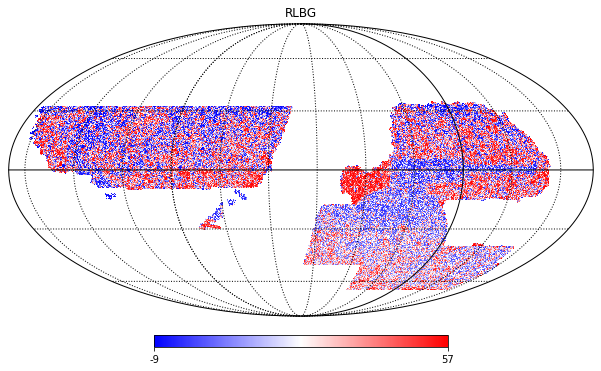

In [9]:
m_RLBG = np.zeros(NPIX)

m_RLBG[df_south.pixel_id.to_numpy()] = df_south.rlbg.to_numpy()
mask = (m_RLBG == 0)
m_RLBG[mask] = np.nan
hp.mollview(m_RLBG, title="RLBG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [10]:
# Getting Exposure Densities across pixels
with open(f'../../bricks_data/pixel2ccd_{NSIDE}.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [11]:
pix_ids = df_south.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict[pix])
df_south['exposures'] = exp_len

In [12]:
df_south.exposures = df_south.exposures.astype(int)
print(len(df_south[df_south.exposures < 7]))

4414


0.0 180.0 -180.0 180.0


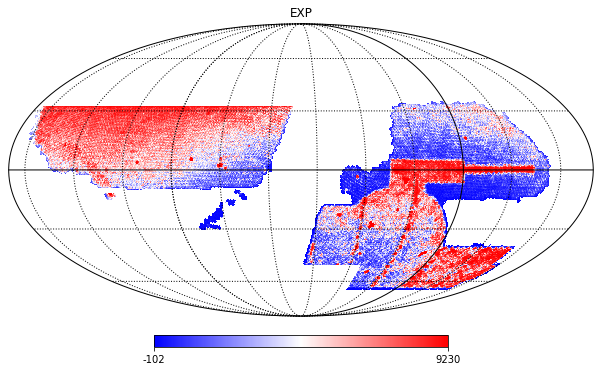

In [13]:
m_EXP = np.zeros(NPIX)

m_EXP[df_south.pixel_id.to_numpy()] = df_south.exposures.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

In [14]:
# Import New Systematics here --> maps by Boris
m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")
m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

m_hinh = hp.reorder(map_in=m_hinh, n2r=True)
m_gaia = hp.reorder(map_in=m_gaia, n2r=True)
m_gaia12 = hp.reorder(map_in=m_gaia12, n2r=True)
m_sagitarius = hp.reorder(map_in=m_sagitarius, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_hinh, m_gaia, m_gaia12, m_sagitarius,), axis=1)

df_hinh = pd.DataFrame(id_density, columns=['pixel_id', 'hinh','gaia', 'gaia12', 'sagitarius'])
df_hinh.pixel_id = df_hinh.pixel_id.astype(int)

df_south = pd.merge(df_south, df_hinh, how='inner', on='pixel_id')

In [15]:

#Plot all stellar maps across the full sky
"""m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
mask = (m_gaia == 0)
m_gaia[mask] = np.nan
hp.mollview(m_gaia, title="gaia", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

mask = (m_sagitarius == 0)
m_sagitarius[mask] = np.nan
hp.mollview(m_sagitarius, title="sagitarius", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
mask = (m_gaia12 == 0)
m_gaia12[mask] = np.nan
hp.mollview(m_gaia12, title="gaia12lt", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")

mask = (m_hinh == 0)
m_hinh[mask] = np.nan
hp.mollview(m_hinh, title="hinh", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()"""

'm_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")\nmask = (m_gaia == 0)\nm_gaia[mask] = np.nan\nhp.mollview(m_gaia, title="gaia", format=\'%i\', nest=True, norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'white\',\n            remove_dip=True, remove_mono=True)\nhp.graticule()\n\nm_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")\n\nmask = (m_sagitarius == 0)\nm_sagitarius[mask] = np.nan\nhp.mollview(m_sagitarius, title="sagitarius", nest=True, format=\'%i\', norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'white\',\n            remove_dip=True, remove_mono=True)\nhp.graticule()\n\nm_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")\nmask = (m_gaia12 == 0)\nm_gaia12[mask] = np.nan\nhp.mollview(m_gaia12, title="gaia12lt", format=\'%i\', nest=True, norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'wh

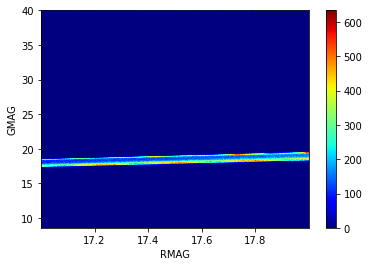

(9603616, 5)


In [16]:
df_stellar = pd.read_csv('../../bricks_data/stellar_catalogue_south.csv')
label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()
# REMOVING OUTLIERS
print(df_stellar.shape)

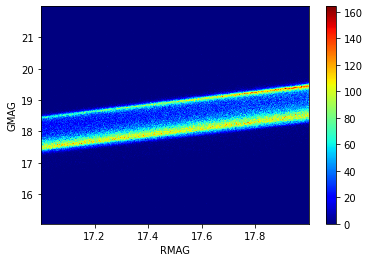

(9349506, 12)
(9282180, 12)


(9245319, 12)

In [17]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=1000, labels=False)

#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=1000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=1000, labels=False)
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)

#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

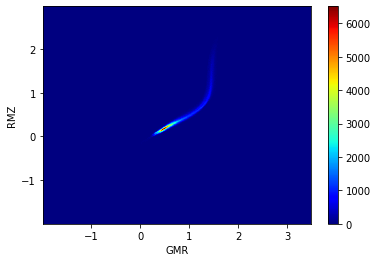

In [18]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [19]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)


mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)


Number of stellars in Sample: 9245319
Mean stellars per Pixel: 8.173654775123948


In [20]:
df_south = df_south.merge(df_stellar, how='left', on='pixel_id')
df_south.fillna(value=0)

,pixel_id,lrg,elg,qso,glbg,rlbg,exposures,hinh,gaia,gaia12,sagitarius,stellar
0,670729,4,10,4,6,4,4,6.411134e+20,1.5000,6.4375,0.0,4.0
1,670730,17,18,15,31,12,4,6.322374e+20,1.4375,5.6250,0.0,5.0
2,670731,4,9,3,9,2,7,6.046366e+20,1.4375,6.3125,0.0,3.0
3,670732,1,15,4,14,6,4,5.831720e+20,0.8750,5.1875,0.0,8.0
4,670733,5,23,3,9,5,7,5.593635e+20,0.8750,5.6875,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1103477,2563032,0,0,0,0,1,6,1.669293e+20,0.6875,3.1250,0.0,1.0
1103478,2573129,0,0,0,0,1,26,1.961183e+20,1.0625,4.3750,0.0,1.0
1103479,2910127,0,0,0,0,1,7,8.665897e+20,1.8750,9.0625,0.0,0.0
1103480,3006927,0,0,0,0,1,5,2.592711e+20,0.3750,3.3125,0.0,0.0


In [21]:
df_south.head()

,pixel_id,lrg,elg,qso,glbg,rlbg,exposures,hinh,gaia,gaia12,sagitarius,stellar
0,670729,4,10,4,6,4,4,6.411134e+20,1.5000,6.4375,0.0,4.0
1,670730,17,18,15,31,12,4,6.322374e+20,1.4375,5.6250,0.0,5.0
2,670731,4,9,3,9,2,7,6.046366e+20,1.4375,6.3125,0.0,3.0
3,670732,1,15,4,14,6,4,5.831720e+20,0.8750,5.1875,0.0,8.0
4,670733,5,23,3,9,5,7,5.593635e+20,0.8750,5.6875,0.0,6.0


0.0 180.0 -180.0 180.0


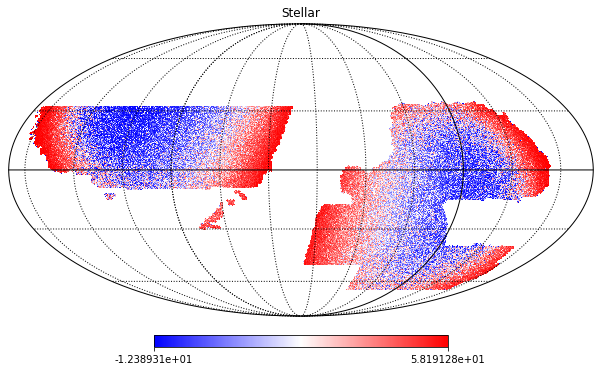

In [22]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df_south.pixel_id.to_numpy()] = df_south.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

#### EBV Extraction

In [23]:
## Getting the centers of each pixel in my corpus as RaDec
pixels_ids = df_south["pixel_id"].to_numpy()
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)
df_south["EBV"] = ebv

0.0 180.0 -180.0 180.0


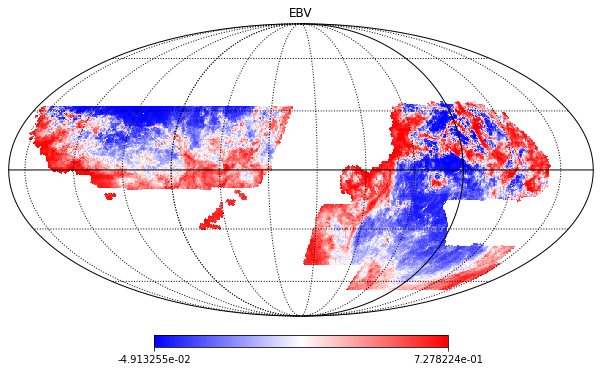

In [24]:
m_EBV = np.zeros(NPIX)

m_EBV[df_south.pixel_id.to_numpy()] = df_south.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


1103482
1075487


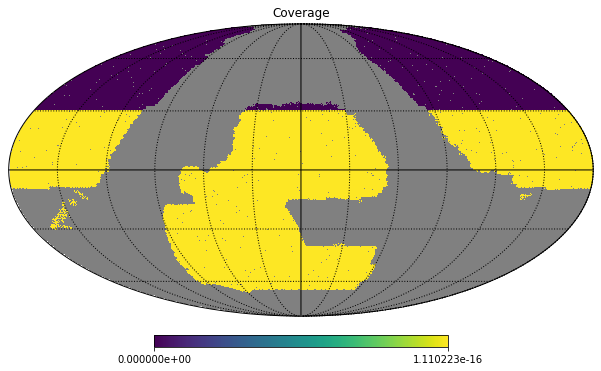

In [25]:
m_coverage = hp.read_map("../../bricks_data/masks/mask_512.fits")
m_coverage = hp.reorder(map_in=m_coverage, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_coverage), axis=1)

df_bad_pix = pd.DataFrame(id_density, columns=['pixel_id', 'coverage'])
df_bad_pix.pixel_id = df_bad_pix.pixel_id.astype(int)
df_bad_pix = df_bad_pix[df_bad_pix.coverage == 1]
m_cover = np.zeros(NPIX)

m_cover[df_bad_pix.pixel_id.to_numpy()] = df_bad_pix.coverage.to_numpy()
mask = (m_cover < 1)
m_cover[mask] = np.nan
hp.mollview(m_cover, title="Coverage", format='%e', norm='hist', cmap="viridis", notext=False, rot=(0, 0, 0),
            badcolor='gray',
            remove_dip=True, remove_mono=True)
hp.graticule()

print(len(df_south))
df_south = pd.merge(df_south, df_bad_pix, how='inner', on='pixel_id')
print(len(df_south))

In [26]:
with open('../../bricks_data/pixel2systematics_geometric_512_2048_inclusive.pickle', 'rb') as f:
    geo_dict_inc = pickle.load(f)
    f.close()

print(len(geo_dict_inc.keys()))
sys_list = []
for key in geo_dict_inc.keys():
    ind_sys_list = geo_dict_inc[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_inc = pd.DataFrame(sys_list, columns=['airmass',
                                                'ccdskysb_g',
                                                'ccdskysb_r',
                                                'ccdskysb_z',
                                                'ccdskycounts_g',
                                                'ccdskycounts_r',
                                                'ccdskycounts_z',
                                                'exptime_g',
                                                'exptime_r',
                                                'exptime_z',
                                                'meansky_g',
                                                'meansky_r',
                                                'meansky_z',
                                                'galdepth_g',
                                                'galdepth_r',
                                                'galdepth_z',
                                                'seeing_g',
                                                'seeing_r',
                                                'seeing_z',
                                                'psfdepth_g',
                                                'psfdepth_r',
                                                'psfdepth_z',
                                                'psfnorm_mean_g',
                                                'psfnorm_mean_r',
                                                'psfnorm_mean_z',
                                                'gausspsfdepth_g',
                                                'gausspsfdepth_r',
                                                'gausspsfdepth_z',
                                                'pixel_covered',
                                                'pixel_id'])


df_south = df_south.merge(df_sys_geo_inc, how='inner', on='pixel_id')
print(len(df_south))
print(df_south.describe())


1804605
1075452
           pixel_id           lrg           elg           qso          glbg  \
count  1.075452e+06  1.075452e+06  1.075452e+06  1.075452e+06  1.075452e+06   
mean   1.655458e+06  8.438921e+00  3.228983e+01  3.893416e+00  2.437675e+01   
std    6.401926e+05  4.800966e+00  7.981959e+00  2.329856e+00  9.686830e+00   
min    6.727790e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.130885e+06  5.000000e+00  2.700000e+01  2.000000e+00  1.800000e+01   
50%    1.538328e+06  8.000000e+00  3.200000e+01  4.000000e+00  2.300000e+01   
75%    2.126907e+06  1.100000e+01  3.700000e+01  5.000000e+00  3.000000e+01   
max    3.007915e+06  3.820000e+02  1.714000e+03  2.620000e+02  2.810000e+02   

               rlbg     exposures          hinh          gaia        gaia12  \
count  1.075452e+06  1.075452e+06  1.075452e+06  1.075452e+06  1.075452e+06   
mean   7.135149e+00  6.142828e+01  3.297518e+20  7.476609e-01  4.086956e+00   
std    4.577272e+00  1.582516e+02  

In [27]:
print(df_south.coverage.unique())

df_south = df_south.drop(columns=['galdepth_g',
                                  'galdepth_r',
                                  'galdepth_z',
                                  'psfdepth_g',
                                  'psfdepth_r',
                                  'psfdepth_z',
                                  'psfnorm_mean_g',
                                  'psfnorm_mean_r',
                                  'psfnorm_mean_z',
                                  'gausspsfdepth_g',
                                  'gausspsfdepth_r',
                                  'meansky_g', 'meansky_r', 'meansky_z',
                                  'exptime_g', 'exptime_r', 'exptime_z',
                                  'gausspsfdepth_z', 'coverage', 'pixel_covered'])


df_south.to_csv('../../bricks_data/uncleaned_systematics_south.csv', index=False)


[1.]


In [28]:
print(sdafs)

NameError: name 'sdafs' is not defined


cols = list(df_south.columns)
cols.remove('pixel_id')

nrows = 39
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_south.pixel_id.to_numpy()] = df_south[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()



## Working on splitting the dataset south into south + DES mirroring the Chaussidon paper

### Splitting on Exposures



In [ ]:
df_south['RA'], df_south['DEC'] = hp.pix2ang(nside=NSIDE, ipix=df_south.pixel_id.to_numpy(), lonlat=True)
df_des = df_south[(df_south.RA < 105) | (df_south.RA > 300)]
df_des = df_des[(df_des.DEC < 10)]
m = np.zeros(NPIX)

m[df_des.pixel_id.to_numpy()] = df_des['exposures'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures',format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)

cut = 57
df_des = df_des[df_des.exposures > cut]
m = np.zeros(NPIX)

m[df_des.pixel_id.to_numpy()] = df_des['exposures'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures',format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)

print(len(df_south))
intersection = pd.Series(list(set(df_south.pixel_id) & set(df_des.pixel_id)))
print(len(intersection))
df_south_comp = df_south[~(df_south['pixel_id'].isin(intersection))]
print(len(df_south_comp))
#df_non_des = df_south[df_south.exposures <= cut]
m = np.zeros(NPIX)

m[df_south_comp.pixel_id.to_numpy()] = df_south_comp['exposures'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures',format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


nrows = 39
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_south_comp.pixel_id.to_numpy()] = df_south_comp[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

nrows = 38
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_des.pixel_id.to_numpy()] = df_des[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()
### South

col = list(df_south_comp.columns)
print(col)

In [ ]:
df_no_outlier = df_south_comp.drop(columns=['galdepth_g',
                                      'galdepth_r',
                                      'galdepth_z',
                                      'psfdepth_g',
                                      'psfdepth_r',
                                      'psfdepth_z',
                                      'psfnorm_mean_g',
                                      'psfnorm_mean_r',
                                      'psfnorm_mean_z',
                                      'gausspsfdepth_g',
                                      'gausspsfdepth_r',
                                      'gausspsfdepth_z',
                                    'coverage',
                                      'RA',
                                      'DEC'])

col = list(df_no_outlier.columns)
print(col)

In [ ]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_south_comp)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_south_comp) - len(df_no_outlier)}")

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(zscore)

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

In [ ]:
#df_no_outlier = df_geo

#df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())
print(len(df_no_outlier[df_no_outlier.exposures > 150]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))
print(len(df_no_outlier[df_no_outlier.exposures < 7]))
plt.hist(df_no_outlier.exposures)
df_no_outlier = df_no_outlier[df_no_outlier.exposures < 150]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()


df_no_outlier = df_no_outlier.drop(columns=['pixel_covered','Z'])
### Scaling the Data

In [ ]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)

print(cololo)
cololo.remove('pixel_id')
cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')
cololo.remove('glbg')
cololo.remove('rlbg')


df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

In [ ]:
ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id,lonlat=True)
ax = plot_sky_binned(ra,dec,data=df_scaled.lrg ,cmap='bwr',label='lrg', plot_type='grid', verbose=True,max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.elg ,cmap='bwr',label='elg', plot_type='grid', verbose=True,max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.qso ,cmap='bwr',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.glbg ,cmap='bwr',label='glbg', plot_type='grid', verbose=True,max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.rlbg ,cmap='bwr',label='rlbg', plot_type='grid', verbose=True,max_bin_area=0.5)


In [ ]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)

print(df_train.head())
print(df_test.head())
print(len(df_train))
print(len(df_test))


df_train.to_csv('../../bricks_data/south.csv', index=False)
df_test.to_csv('../../bricks_data/south_test.csv', index=False)



### DES

In [ ]:
col = list(df_des.columns)
print(col)

In [ ]:
df_no_outlier = df_des.drop(columns=['galdepth_g',
                                      'galdepth_r',
                                      'galdepth_z',
                                      'psfdepth_g',
                                      'psfdepth_r',
                                      'psfdepth_z',
                                      'psfnorm_mean_g',
                                      'psfnorm_mean_r',
                                      'psfnorm_mean_z',
                                      'gausspsfdepth_g',
                                      'gausspsfdepth_r',
                                      'gausspsfdepth_z','coverage',
                                      'RA',
                                      'DEC'])

col = list(df_no_outlier.columns)
print(col)

In [ ]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_des)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_des) - len(df_no_outlier)}")

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(zscore)

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

In [ ]:
#df_no_outlier = df_geo

#df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())
plt.hist(df_no_outlier.exposures)
print(len(df_no_outlier[df_no_outlier.exposures > 350]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))
plt.hist(df_no_outlier.exposures)
df_no_outlier = df_no_outlier[df_no_outlier.exposures < 350]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()
df_no_outlier = df_no_outlier.drop(columns=['pixel_covered','Z'])

### Scaling the Data

In [ ]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)

print(cololo)
cololo.remove('pixel_id')
cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')
cololo.remove('glbg')
cololo.remove('rlbg')

df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])


In [ ]:
ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id,lonlat=True)

ax = plot_sky_binned(ra,dec,data=df_scaled.lrg ,cmap='bwr',label='lrg', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.elg ,cmap='bwr',label='elg', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.qso ,cmap='bwr',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.glbg ,cmap='bwr',label='glbg', plot_type='grid', verbose=True,max_bin_area=0.5)


In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.rlbg ,cmap='bwr',label='rlbg', plot_type='grid', verbose=True,max_bin_area=0.5)


In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.gaia12 ,cmap='bwr',label='gaia12', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.exposures ,cmap='bwr',label='exposures', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.meansky_g ,cmap='bwr',label='meansky_g', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.meansky_r ,cmap='bwr',label='meansky_r', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.meansky_z ,cmap='bwr',label='meansky_z', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.exptime_g ,cmap='bwr',label='exptime_g', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.exptime_r ,cmap='bwr',label='exptime_r', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.exptime_z ,cmap='bwr',label='exptime_z', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)

print(df_train.head())
print(df_test.head())
print(len(df_train))
print(len(df_test))


df_train.to_csv('../../bricks_data/des.csv', index=False)
df_test.to_csv('../../bricks_data/des_test.csv', index=False)



